In [56]:
import subprocess
import time
import matplotlib.pyplot as plt

In [57]:
#Definição de função para executar uma linha de comando e retornar o tempo de execução
def get_exec_time(cmd_line):
    start_time = time.time()
    
    # Executa o código com base na command line e aguarda a conclusão
    subprocess.run(cmd_line, shell=True, check=True)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time



In [58]:
# Variáveis para escalabilidade Forte (Tamanho fixo, threads variam)
strong_scalability = {
    "min_threads": 1,
    "max_threads": 10,
    "size": 3000,
    "list_threads": [],
    "results": [],
}


# Obtém resultados para o caso de escalabilidade forte
for threads in range(strong_scalability['min_threads'], strong_scalability['max_threads'] + 1):    
    strong_scalability['list_threads'].append(threads)
    
    # Executa o programa  e guarda o tempo
    strong_scalability['results'].append(
        get_exec_time(f"OMP_NUM_THREADS={threads} ./jacobi -n {strong_scalability['size']}")
    )



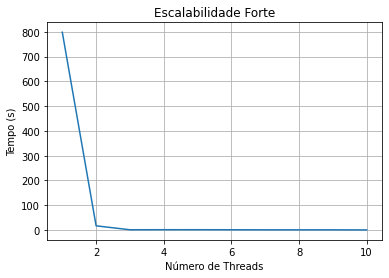

In [59]:
# Gráfico de escalabilidade Forte
x_axis = strong_scalability['list_threads']
y_axis = strong_scalability['results']
plt.plot(x_axis, y_axis)

# Configurações do gráfico
plt.xlabel('Número de Threads')
plt.ylabel('Tempo (s)')
plt.title('Escalabilidade Forte')

# Exibição do gráfico
plt.grid(True)
plt.savefig(f'escalabilidade_forte.png')
plt.show()



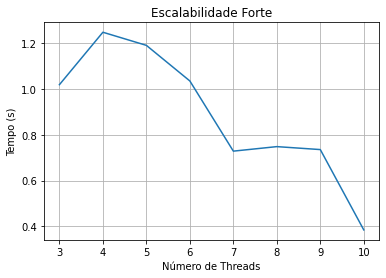

In [74]:
# Gráfico de escalabilidade Forte

x_axis = strong_scalability['list_threads'][2:] 
y_axis = strong_scalability['results'][2:]
plt.plot(x_axis, y_axis)

# Configurações do gráfico
plt.xlabel('Número de Threads')
plt.ylabel('Tempo (s)')
plt.title('Escalabilidade Forte')

# Exibição do gráfico
plt.grid(True)
plt.savefig(f'escalabilidade_forte2.png')
plt.show()



In [61]:
# Variáveis escalabilidade Fraca (Tamanho do problema e número de threads variam)
weak_scalability = {
    "min_threads": 1,
    "max_threads": 10,
    "size": 500,
    "step": 500,
    "list_threads": [],
    "list_sizes": [],
    "results": [],
}


for threads in range(weak_scalability['min_threads'], weak_scalability['max_threads'] + 1):    
    weak_scalability['list_threads'].append(threads)
    weak_scalability['size'] = weak_scalability['size'] + weak_scalability['step']
    weak_scalability['list_sizes'].append(weak_scalability['size'])
    
    # Executa o programa  e guarda o tempo
    weak_scalability['results'].append(
        get_exec_time(f"OMP_NUM_THREADS={threads} ./jacobi -n {weak_scalability['size']}")
    )



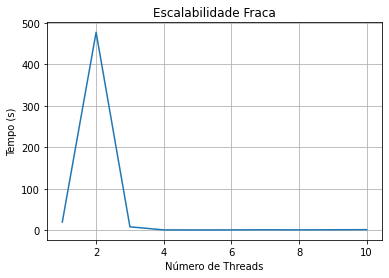

In [71]:
# Gráfico de escalabilidade Fraca
x_axis = weak_scalability['list_threads']
y_axis = weak_scalability['results']
plt.plot(x_axis, y_axis)

# Configurações do gráfico
plt.xlabel('Número de Threads')
plt.ylabel('Tempo (s)')
plt.title('Escalabilidade Fraca')

# Exibição do gráfico
plt.grid(True)
plt.savefig(f'escalabilidade_fraca.png')
plt.show()

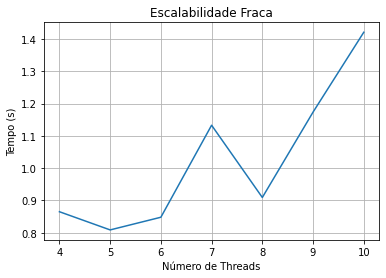

In [72]:
# Gráfico de escalabilidade Fraca
x_axis = weak_scalability['list_threads'][3:]
y_axis = weak_scalability['results'][3:]
plt.plot(x_axis, y_axis)

# Configurações do gráfico
plt.xlabel('Número de Threads')
plt.ylabel('Tempo (s)')
plt.title('Escalabilidade Fraca')

# Exibição do gráfico
plt.grid(True)
plt.savefig(f'escalabilidade_fraca2.png')
plt.show()